Starting gradient descent at c = 0,m=0 and error=613.8712562814071
After 50000 iterations m=1.1912394734662153, c=4.96923203200961 and error = 50.17219441725183
Line Equation:y=1.1912394734662153x+4.96923203200961


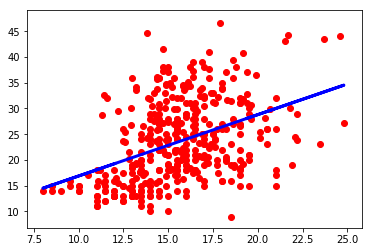

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
car_mpg = pd.read_csv('carData.csv',sep=',',index_col=None)
car_mpg.head()
model = pd.DataFrame(car_mpg, columns=['MPG','Acceleration'])
model.head()

def compute_error(c,m,points):
    totalerr=0
    for i in range(0,len(points)):
        x = points[i,2]
        y = points[i,1]
        totalerr += (y-(m * x + c))**2
    return totalerr/float(len(points)) 

def step_gradient(c_curr,m_curr,points,learning_rate):
    c_grd = 0
    m_grd = 0
    n = float(len(points))
    for i in range(0,len(points)):
        x = points[i,2]
        y = points[i,1]
        m_grd += -(2/n) * (y - (m_curr * x + c_curr)) * x
        c_grd += -(2/n) * (y - (m_curr * x + c_curr)) * 1
    new_m = m_curr - (learning_rate * m_grd)
    new_c = c_curr - (learning_rate * c_grd)
    return(new_c,new_m)

def gradient_runner(points, m_initial, c_initial, learning_rate,iterations):
    m = m_initial
    c = c_initial
    for i in range(iterations):
        c,m = step_gradient(c,m,points,learning_rate)
    return(c,m)    

m_initial = 0
c_initial = 0
iterations = 50000
learning_rate = 0.003
points=model
points
points=points.reset_index().values
points
print("Starting gradient descent at c = {0},m={1} and error={2}".format(c_initial,m_initial,compute_error(c_initial,m_initial,points)))
[c,m] = gradient_runner(points, m_initial, c_initial, learning_rate,iterations)
print("After {0} iterations m={1}, c={2} and error = {3}".format(iterations,m,c,compute_error(c,m,points)))
for i in range(0,len(points)):
    x = points[i,2]
    y = points[i,1]
    plt.scatter(x,y,color='red')
print("Line Equation:y={0}x+{1}".format(m,c))   
plt.plot(model.Acceleration, m * model.Acceleration + c, color = 'blue',linewidth=3)